## Setting up parallel training on N GPU/CPU

In [1]:
#!g1.2 #noqa
import random
import sys

import torch
import torch.multiprocessing as mp
from torchvision import transforms

In [2]:
#!g1.2 #noqa
sys.path.append('/home/jupyter/work/resources/')

In [3]:
#!g1.2 #noqa
from processingDataSet import MaskDataset, PreprocessingData, get_not_RGB_pic

In [4]:
#!g1.2 #noqa
#data_path = '/home/jupyter/work/resources/models/datasets/segNet'
data_path = '/home/jupyter/mnt/datasets/Segmentation/Training'
model_weights_dir = '/home/jupyter/work/resources/figureExtraction/weights/'
weights_path = model_weights_dir + 'pretrained_encoder_weights_DEFAULT.pt'
random_state = 10

In [5]:
#!g1.2 #noqa
prData = PreprocessingData()
train_data, val_data = prData.get_data(data_path, random_state)

In [6]:
#!g1.2 #noqa
print('Train data size: ', len(train_data), 'Validation data size: ', len(val_data))

Train data size:  84999 Validation data size:  4474


In [7]:
#!g1.2 #noqa
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.RandomVerticalFlip(p = 0.5),
    transforms.RandomPerspective(p = 0.5),
    transforms.RandomRotation(random.randint(0, 180))])

In [8]:
#!g1.2 #noqa
train_set = MaskDataset(data_path, train_data, transform)
val_set = MaskDataset(data_path, val_data, transform)

In [9]:
#!g1.2 #noqa
from distLearningFunc import worker
from SegNetModel import SegNet

world_size = 2  # Number of GPU
batch_size = 30
seed = random_state
epochs = 1
model = SegNet()  
state_dict = torch.load(weights_path)
model.encoder.load_state_dict(state_dict, strict = False)

mp.spawn(worker, args = (model, world_size, train_set, val_set, batch_size, seed, epochs,'2024_01_22_12_24_41.pt'),
         nprocs = world_size)

2024-01-22 12:43:46.707722: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-22 12:43:46.767382: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 12:43:47.846227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-01-22 12:43:52.556516: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-01-22 12:43:57.840297: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


OrderedDict([('module.encoder.0.weight', tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
          [-5.8312e-01,  3.5655e-01,  7.6566e-01],
          [-6.9022e-01, -4.8019e-02,  4.8409e-01]],

         [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
          [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
          [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],

         [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
          [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
          [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],


        [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
          [-4.2805e-01, -2.4349e-01,  2.4628e-01],
          [-2.5066e-01,  1.4177e-01, -5.4864e-03]],

         [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
          [-8.4127e-01, -3.5176e-01,  5.6398e-01],
          [-2.4194e-01,  5.1928e-01,  5.3915e-01]],

         [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
          [-4.7144e-01, -1.5503e-01,  3.4589e-01],
          [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],


        [[[ 1.7715e-01,  

  0%|          | 0/1416 [00:00<?, ?it/s]

 {'state': {0: {'step': tensor(1416., device='cuda:1'), 'exp_avg': tensor([[[[ 8.0120e-04,  8.2387e-04,  7.9722e-04],
          [ 7.7799e-04,  7.8240e-04,  7.5249e-04],
          [ 7.5922e-04,  7.4262e-04,  6.9450e-04]],

         [[ 4.4909e-04,  4.9153e-04,  4.7025e-04],
          [ 4.0038e-04,  4.3416e-04,  4.1865e-04],
          [ 3.6865e-04,  3.8224e-04,  3.5602e-04]],

         [[ 3.6431e-04,  3.9754e-04,  3.7173e-04],
          [ 2.9026e-04,  3.0270e-04,  2.8702e-04],
          [ 2.2871e-04,  2.1781e-04,  1.9278e-04]]],


        [[[ 2.6285e-04,  2.5766e-04,  2.5751e-04],
          [ 2.1204e-04,  2.0530e-04,  2.0207e-04],
          [ 1.7343e-04,  1.6516e-04,  1.7618e-04]],

         [[ 1.8232e-04,  1.7101e-04,  1.6512e-04],
          [ 1.6630e-04,  1.5250e-04,  1.4195e-04],
          [ 1.5005e-04,  1.3422e-04,  1.3597e-04]],

         [[ 6.7894e-05,  7.8991e-05,  8.2097e-05],
          [ 7.9561e-05,  8.0851e-05,  7.1492e-05],
          [ 8.6830e-05,  7.7000e-05,  7.6006e-05]]],



  3%|▎         | 41/1416 [00:24<12:48,  1.79it/s]

KeyboardInterrupt: 

In [9]:
#!g1.2 #noqa
'''
    Warning from torch.multiprossesing.spawn:

    If the main process exits abruptly (e.g. because of an incoming signal),
    Python’s multiprocessing sometimes fails to clean up its children.
    It’s a known caveat, so if you’re seeing any resource leaks after interrupting the interpreter,
    it probably means that this has just happened to you.
    https://pytorch.org/docs/stable/multiprocessing.html
'''
# To fix that problem, find the PID of this proсess(es)
# (depends on how many workers were started) and kill them.
!ps -fe | grep multiprocessing.spawn

jupyter     4731    4383  0 11:59 ?        00:00:00 /bin/sh -c          pip () {             echo 'pip is disabled in bash. Please use %pip magic.' >&2             exit 1         }         pip3 () {             pip         }          ps -fe | grep multiprocessing.spawn 
jupyter     4733    4731  0 11:59 ?        00:00:00 grep multiprocessing.spawn


In [ ]:
#!g1.2 #noqa
!kill 3629 3627

In [10]:
#!g1.2
!ls ./models/checkpoints

2024_01_19_12_02_30.pt
2024_01_19_12_29_35.pt
2024_01_19_12_56_40.pt
2024_01_19_13_23_44.pt
2024_01_19_13_50_48.pt


In [55]:
#!g1.2 #noqa
trained_state_dict = torch.load('/home/jupyter/work/resources/figureExtraction/models/checkpoints/2024_01_19_13_50_48.pt')

In [56]:
#!g1.2
trained_state_dict.keys()

odict_keys(['encoder.0.weight', 'encoder.0.bias', 'encoder.1.weight', 'encoder.1.bias', 'encoder.1.running_mean', 'encoder.1.running_var', 'encoder.1.num_batches_tracked', 'encoder.3.weight', 'encoder.3.bias', 'encoder.4.weight', 'encoder.4.bias', 'encoder.4.running_mean', 'encoder.4.running_var', 'encoder.4.num_batches_tracked', 'encoder.7.weight', 'encoder.7.bias', 'encoder.8.weight', 'encoder.8.bias', 'encoder.8.running_mean', 'encoder.8.running_var', 'encoder.8.num_batches_tracked', 'encoder.10.weight', 'encoder.10.bias', 'encoder.11.weight', 'encoder.11.bias', 'encoder.11.running_mean', 'encoder.11.running_var', 'encoder.11.num_batches_tracked', 'encoder.14.weight', 'encoder.14.bias', 'encoder.15.weight', 'encoder.15.bias', 'encoder.15.running_mean', 'encoder.15.running_var', 'encoder.15.num_batches_tracked', 'encoder.17.weight', 'encoder.17.bias', 'encoder.18.weight', 'encoder.18.bias', 'encoder.18.running_mean', 'encoder.18.running_var', 'encoder.18.num_batches_tracked', 'encode

In [12]:
#!g1.2
model_trained = SegNet()
model_trained.load_state_dict(trained_state_dict)

<All keys matched successfully>

In [14]:
#!g1.2
test_set = MaskDataset(data_path, val_data)

In [32]:
#!g1.2
from torchvision import io

In [46]:
#!g1.2
img_path = '/home/jupyter/work/resources/figureExtraction/datasets/segNet/input/227.jpg'
mask_path = '/home/jupyter/work/resources/figureExtraction/datasets/segNet/Output/227.png'
image = io.read_image(img_path)
mask = io.read_image(mask_path)
norm = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
to_resized_tensor = transforms.Compose([
            transforms.Resize([224, 224], antialias=True)])
image = norm(to_resized_tensor(image).div(255))
mask = to_resized_tensor(mask).div(255)

In [47]:
#!g1.2
#y = model_trained(test_set[0][0].unsqueeze(0))
y = model_trained(image.unsqueeze(0))

In [17]:
#!g1.2
from matplotlib import pyplot as plt

In [ ]:
#!g1.2
y.shape

In [18]:
#!g1.2
import numpy as np
def conv_to_img(tensor: torch.tensor) -> np.array:
    """Convert image to display by pyplot."""
    img = tensor.to('cpu').clone().detach()
    img = img.numpy().squeeze()
    img = img.clip(0, 1)
    return img

In [48]:
#!g1.2
res = conv_to_img(y)

In [20]:
#!g1.2
def conv_to_img1(tensor: torch.tensor) -> np.array:
    """Convert image to display by pyplot."""
    img = tensor.to('cpu').clone().detach()
    img = img.numpy().squeeze()
    img = img.transpose(1, 2, 0)
    img = img * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    img = img.clip(0, 1)
    return img

In [23]:
#!g1.2
test_set[1][0].shape

torch.Size([3, 224, 224])

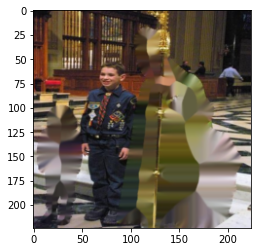

In [28]:
#!g1.2
plt.imshow(conv_to_img1(test_set[0][0]))

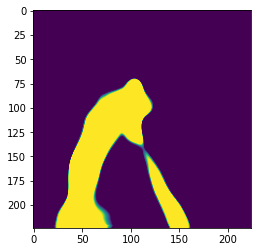

In [49]:
#!g1.2
plt.imshow(res)

In [ ]:
#!g1.2


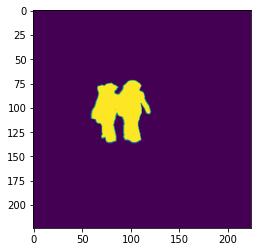

In [50]:
#!g1.2
plt.imshow(conv_to_img(mask))